# Course:  Convolutional Neural Networks for Image Classification

## Section-1

<span style="font-size:14pt">Quick Win #3: Convolution + Pooling</span>  
  
<span style="font-size:14pt">**Description:**</span>  
<span style="font-size:13pt">*Combine two operations together*</span>  
<span style="font-size:13pt">*Plot resulted output images*</span>  
  
<span style="font-size:13pt">**File:** *convolution_and_pooling.ipynb*</span>

<span style="font-size:14pt">**Algorithm:**</span>  
  
<span style="font-size:13pt">**-->** Defining function for convolution operation</span>  
<span style="font-size:13pt">**-->** Defining function to exclude non-needed values</span>  
<span style="font-size:13pt">**-->** Defining function for pooling operation</span>  
<span style="font-size:13pt">**-->** Defining filters for convolution</span>  
<span style="font-size:13pt">**-->** Implementing architecture of 3 * [C, P]</span>  
  
<span style="font-size:13pt">**Result:**
Plot with input GRAY image and downsampled image after pooling</span>

## Importing libraries

In [1]:
# Importing needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Importing library to see calculation progress inside loops in Real Time
# To install, use following command: pip install tqdm
# Don't forget to activate environment in which you're working
from tqdm import tqdm


## Function for 2D convolution

In [2]:
def convolution_2d(feature_map, f, pad=1, step=1):

    # Hyperparameters for 2D convolution:
    # f_size - filter (kernel) size (width and height are equal)
    # step - stride (step) for sliding
    # pad - zero-valued frame around image to process boundaries

    # Output dimension is calculated by following equations:
    # height_out = (height_in - f_size + 2 * pad) / step + 1
    # width_out = (width_in - f_size + 2 * pad) / step + 1

    # Calculating spatial size of output resulted array (width and height)
    # Making output width and height as integer numbers,
    # in case input width/height is odd
    f_size = f.shape[0]  # (width and height are equal)
    height_out = int((feature_map.shape[0] - f_size + 2 * pad) / step + 1)
    width_out = int((feature_map.shape[1] - f_size + 2 * pad) / step + 1)

    # Applying to feature map pad frame with zero values to process boundaries
    # Using Numpy method 'pad'
    feature_map_pad = np.pad(feature_map, (pad, pad),
                             mode='constant',
                             constant_values=0)

    # Preparing zero valued output array for convolved feature map
    output_feature_map = np.zeros((height_out, width_out))

    # Implementing convolution operation to feature map
    # Sliding through entire feature map (that is with pad frame) by filter
    for i in tqdm(range(0, feature_map_pad.shape[0] - f_size + 1, step)):
        for j in range(0, feature_map_pad.shape[1] - f_size + 1, step):
            # Extracting (slicing) a patch (the same size with filter)
            # from feature map with pad frame
            patch = feature_map_pad[i:i+f_size, j:j+f_size]

            # Applying elementwise multiplication and summation -
            # this is convolution operation
            # When we use '*' with matrices, then elementwise multiplication
            # will be applied
            output_feature_map[i, j] = np.sum(patch * f)

    # Returning convolved feature map
    return output_feature_map


## Function to exclude non-needed values  
### (less than 0 and more than 255)

In [3]:
def range_0_255(feature_map):

    # To exclude values that are less than 0 and more than 255,
    # Numpy function 'clip' is applied
    # It keeps values of Numpy array in the given range
    # And it replaces non-needed values with boundary numbers
    output_feature_map = np.clip(feature_map, 0, 255)

    # Returning processed feature map
    return output_feature_map


## Function for pooling

In [4]:
def pooling(feature_map, f_pooling=2, step=2):

    # Hyperparameters for pooling:
    # f_pooling - filter size for pooling (width and height are equal)
    # step - stride (step) for sliding

    # Output dimension is calculated by following equations:
    # height_out = (height_in - f_pooling) / step + 1
    # width_out = (width_in - f_pooling) / step + 1

    # Calculating spatial size of output resulted array (width and height)
    # Making output width and height as integer numbers,
    # in case input width/height is odd
    height_out = int((feature_map.shape[0] - 2) / 2 + 1)
    width_out = int((feature_map.shape[1] - 2) / 2 + 1)

    # Preparing zero valued output array for feature map after pooling
    feature_map_after_pooling = np.zeros((height_out, width_out))

    # Implementing pooling operation
    # Preparing indexes for rows of output array
    ii = 0

    # Sliding through entire feature map
    # Wrapping the loop with 'tqdm' in order to see progress in real time
    for i in tqdm(range(0, feature_map.shape[0] - f_pooling + 1, step)):
        # Preparing indexes for columns of output array
        jj = 0

        for j in range(0, feature_map.shape[1] - f_pooling + 1, step):
            # Extracting (slicing) a 2x2 patch (the same size with filter)
            # from feature map
            patch = feature_map[i:i+f_pooling, j:j+f_pooling]

            # Applying max pooling operation - choosing maximum element
            # from the current patch
            feature_map_after_pooling[ii, jj] = np.max(patch)

            # Increasing indexes for rows of output array
            jj += 1

        # Increasing indexes for columns of output array
        ii += 1

    # Returning feature map after pooling
    return feature_map_after_pooling


## Defining filters (kernels) for convolution

In [5]:
# Setting common filters (kernels) with size 3x3 for edge detection

# Sobel filter to detect vertical changes on image
filter_1 = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])

# Laplacian filter to detect regions with different brightness on image
filter_2 = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])

# Prewitt filter to detect vertical changes on image
filter_3 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])


# Setting random filters (kernels) with size 3x3
# and integer numbers in range [-1, 1]
filter_11 = np.random.randint(low=-1, high=1, size=(3, 3))
filter_22 = np.random.randint(low=-1, high=1, size=(3, 3))
filter_33 = np.random.randint(low=-1, high=1, size=(3, 3))


## Reading input image and converting into GRAY

In [6]:
# Reading coloured input image by OpenCV library
# In this way image is opened already as Numpy array

# (!) OpenCV by default reads image in BGR format (order of channels)
# (!) On Windows, the path might look like following:
# r'images\cat.png'
# or:
# 'images\\cat.png'
image_BGR = cv2.imread('images/cat.png')


# Converting input image to GRAY by OpenCV function
image_GRAY = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2GRAY)


## Implementing architecture: [C1, P1]-->[C2, P2]-->[C3, P3]

In [7]:
# [C1, P1]
# Applying 2D convolution
c1 = convolution_2d(image_GRAY, filter_1, pad=1, step=1)
# Excluding non-needed values
c1 = range_0_255(c1)
# Applying pooling
c1_p1 = pooling(c1, f_pooling=2, step=2)


# [C2, P2]
# Applying 2D convolution
c2 = convolution_2d(c1_p1, filter_2, pad=1, step=1)
# Excluding non-needed values
c2 = range_0_255(c2)
# Applying pooling
c2_p2 = pooling(c2, f_pooling=2, step=2)


# [C3, P3]
# Applying 2D convolution
c3 = convolution_2d(c2_p2, filter_3, pad=1, step=1)
# Excluding non-needed values
c3 = range_0_255(c3)
# Applying pooling
c3_p3 = pooling(c3, f_pooling=2, step=2)


# Check point
# Showing shape of GRAY image
print('{0} Shape of input GRAY image'.format(image_GRAY.shape))
print()

# Showing shape of feature map after [C1] and [P1]
print('{0} Shape of feature map after [C1]'.format(c1.shape))
print('{0} Shape of feature map after [P1]'.format(c1_p1.shape))
print()

# Showing shape of feature map after [C2] and [P2]
print('{0} Shape of feature map after [C2]'.format(c2.shape))
print('{0} Shape of feature map after [P2]'.format(c2_p2.shape))
print()

# Showing shape of feature map after [C3] and [P3]
print('{0} Shape of feature map after [C3]'.format(c3.shape))
print('{0} Shape of feature map after [P3]'.format(c3_p3.shape))


100%|██████████| 106/106 [00:00<00:00, 1756.00it/s]

(853, 1280) Shape of input GRAY image

(853, 1280) Shape of feature map after [C1]
(426, 640) Shape of feature map after [P1]

(426, 640) Shape of feature map after [C2]
(213, 320) Shape of feature map after [P2]

(213, 320) Shape of feature map after [C3]
(106, 160) Shape of feature map after [P3]


## Plotting resulted feature maps

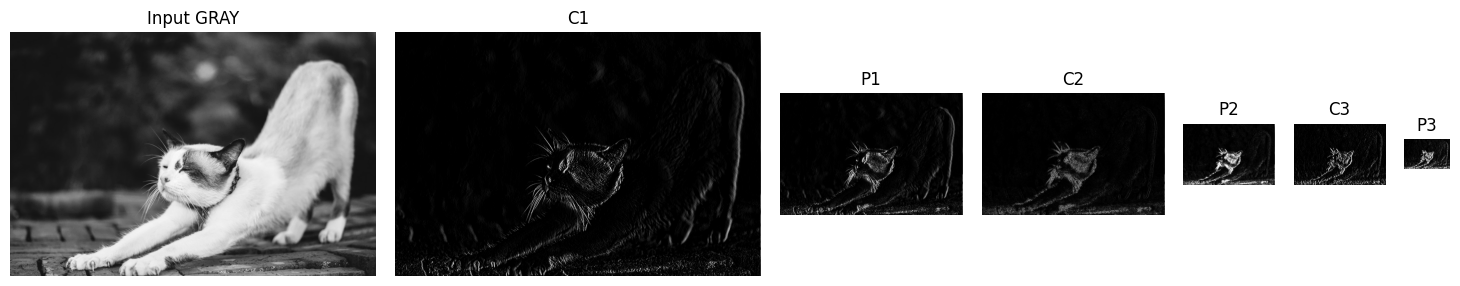

In [8]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
plt.rcParams['figure.figsize'] = (18.0, 10.0)


# Defining a figure object with number of needed subplots
# ax is a (7,) Numpy array and to access specific subplot we call it by ax[0]
# 'gridspec_kw' is the dictionary with keywords to specify the ratio of subplots
# --------------------------------------------------[I, C1, P1, C2, P2, C3, P3]
figure, ax = plt.subplots(nrows=1, ncols=7,
                          gridspec_kw={'width_ratios': [8, 8, 4, 4, 2, 2, 1]})


# Adjusting first column with input GRAY image
ax[0].imshow(image_GRAY, cmap=plt.get_cmap('gray'))

# Adjusting second column with feature map after C1
ax[1].imshow(c1, cmap=plt.get_cmap('gray'))

# Adjusting third column with feature map after P1
ax[2].imshow(c1_p1, cmap=plt.get_cmap('gray'))

# Adjusting fourth column with feature map after C2
ax[3].imshow(c2, cmap=plt.get_cmap('gray'))

# Adjusting fifth column with feature map after P2
ax[4].imshow(c2_p2, cmap=plt.get_cmap('gray'))

# Adjusting sixth column with feature map after C3
ax[5].imshow(c3, cmap=plt.get_cmap('gray'))

# Adjusting seventh column with feature map after P3
ax[6].imshow(c3_p3, cmap=plt.get_cmap('gray'))


# Giving names to columns
ax[0].set_title('Input GRAY', fontsize=12)
ax[1].set_title('C1', fontsize=12)
ax[2].set_title('P1', fontsize=12)
ax[3].set_title('C2', fontsize=12)
ax[4].set_title('P2', fontsize=12)
ax[5].set_title('C3', fontsize=12)
ax[6].set_title('P3', fontsize=12)


# Hiding axes to all subplots
for a in range(7):
    ax[a].axis('off')


# Adjusting distance between subplots
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.1, hspace=0.1)


# Saving the plot
# (!) On Windows, the path might look like following:
# r'images\plot_pooling.png'
# or:
# 'images\\plot_pooling.png'
figure.savefig('images/plot_convolution_and_pooling.png')


# Showing the plot
plt.show()


### Some comments
  
<span style="font-size:13pt">To get more details for generating random integer numbers from Numpy library:</span>  
<span style="font-size:13pt">**print(help(np.random.randint))**</span>  
  
<span style="font-size:13pt">To get more details for usage of built-in format function:</span>  
<span style="font-size:13pt">**print(help(''.format))**</span>

In [9]:
print(help(np.random.randint))

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)

    Return random integers from `low` (inclusive) to `high` (exclusive).

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

    .. note::
        New code should use the `~numpy.random.Generator.integers`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
     

In [10]:
print(help(''.format))

Help on built-in function format:

format(...) method of builtins.str instance
    S.format(*args, **kwargs) -> str

    Return a formatted version of S, using substitutions from args and kwargs.
    The substitutions are identified by braces ('{' and '}').

None
